# **Credit Card Lead Prediction**

### Submitted by:- Rishabh Dhiman

## Data upload

In [1]:
# uploading data files to google colab vm
from google.colab import files
datafiles = files.upload()

Saving test_mSzZ8RL.csv to test_mSzZ8RL.csv
Saving train_s3TEQDk.csv to train_s3TEQDk.csv


## Libraries import

In [1]:
# importing all the required libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

## Data loading & Exploratory data analysis (EDA)

In [2]:
# loading train and test data into pandas dataframes
train_df = pd.read_csv('train_s3TEQDk.csv')
test_df = pd.read_csv('test_mSzZ8RL.csv')

In [3]:
# inspecting train data
train_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
# inspecting test data
test_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [5]:
# shapes of train and test data
print(train_df.shape)
print(test_df.shape)

(245725, 11)
(105312, 10)


In [6]:
# checking whether there is any mismatch between train and test dat for categorical values of gender attribute
print(sorted(list(train_df['Gender'].unique())))
print(sorted(list(test_df['Gender'].unique())))

['Female', 'Male']
['Female', 'Male']


In [7]:
# checking whether there is any mismatch between train and test dat for categorical values of region_code attribute
print(sorted(list(train_df['Region_Code'].unique())))
print(sorted(list(test_df['Region_Code'].unique())))

['RG250', 'RG251', 'RG252', 'RG253', 'RG254', 'RG255', 'RG256', 'RG257', 'RG258', 'RG259', 'RG260', 'RG261', 'RG262', 'RG263', 'RG264', 'RG265', 'RG266', 'RG267', 'RG268', 'RG269', 'RG270', 'RG271', 'RG272', 'RG273', 'RG274', 'RG275', 'RG276', 'RG277', 'RG278', 'RG279', 'RG280', 'RG281', 'RG282', 'RG283', 'RG284']
['RG250', 'RG251', 'RG252', 'RG253', 'RG254', 'RG255', 'RG256', 'RG257', 'RG258', 'RG259', 'RG260', 'RG261', 'RG262', 'RG263', 'RG264', 'RG265', 'RG266', 'RG267', 'RG268', 'RG269', 'RG270', 'RG271', 'RG272', 'RG273', 'RG274', 'RG275', 'RG276', 'RG277', 'RG278', 'RG279', 'RG280', 'RG281', 'RG282', 'RG283', 'RG284']


In [8]:
# checking whether there is any mismatch between train and test dat for categorical values of occupation attribute
print(sorted(list(train_df['Occupation'].unique())))
print(sorted(list(test_df['Occupation'].unique())))

['Entrepreneur', 'Other', 'Salaried', 'Self_Employed']
['Entrepreneur', 'Other', 'Salaried', 'Self_Employed']


In [9]:
# checking whether there is any mismatch between train and test dat for categorical values of channel_code attribute
print(sorted(list(train_df['Channel_Code'].unique())))
print(sorted(list(test_df['Channel_Code'].unique())))

['X1', 'X2', 'X3', 'X4']
['X1', 'X2', 'X3', 'X4']


In [10]:
# checking whether there is any mismatch between train and test dat for categorical values of credit_product attribute
print((list(train_df['Credit_Product'].unique())))
print((list(test_df['Credit_Product'].unique())))

['No', nan, 'Yes']
['Yes', nan, 'No']


In [11]:
# checking whether there is any mismatch between train and test dat for categorical values of is_active attribute
print(sorted(list(train_df['Is_Active'].unique())))
print(sorted(list(test_df['Is_Active'].unique())))

['No', 'Yes']
['No', 'Yes']


In [12]:
# checking %age of unique values present in both train and test set for numeric attribute age
print((train_df['Age'].nunique()/len(train_df))*100)
print((test_df['Age'].nunique()/len(test_df))*100)

0.025638416929494354
0.058872683075053174


In [13]:
# checking %age of unique values present in both train and test set for numeric attribute vintage
print((train_df['Vintage'].nunique()/len(train_df))*100)
print((test_df['Vintage'].nunique()/len(test_df))*100)

0.026859293926136944
0.06267092069279855


In [14]:
# checking %age of unique values present in both train and test set for numeric attribute avg_account_balance
print((train_df['Avg_Account_Balance'].nunique()/len(train_df))*100)
print((test_df['Avg_Account_Balance'].nunique()/len(test_df))*100)

55.05829687658969
74.3647447584321


In [15]:
# actual number of unique values for age in train and test set
print(train_df['Age'].nunique())
print(test_df['Age'].nunique())

63
62


In [16]:
# actual number of unique values for vintage in train and test set
print(train_df['Vintage'].nunique())
print(test_df['Vintage'].nunique())

66
66


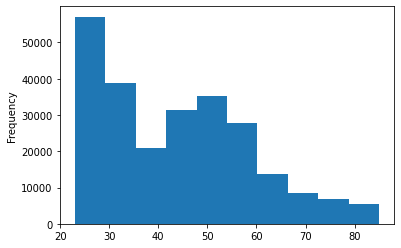

In [17]:
# ditribution of age in train set
train_df['Age'].plot(kind='hist',bins=10)

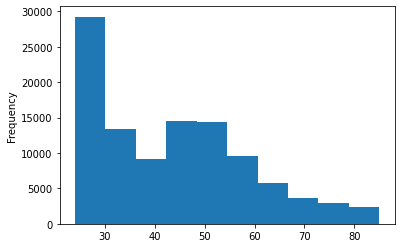

In [18]:
# distribution of age in test set - almost same as of train set
test_df['Age'].plot(kind='hist',bins=10)

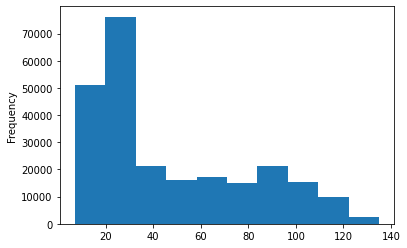

In [19]:
# distribution of vintage in train set
train_df['Vintage'].plot(kind='hist',bins=10)

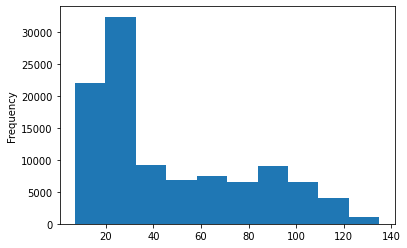

In [20]:
# distribution of vintage in test set - almost same as of train set
test_df['Vintage'].plot(kind='hist',bins=10)

In [21]:
# frequency and %age distribution of gender attribute in both train and test set
print(train_df['Gender'].value_counts())
print(test_df['Gender'].value_counts())

print((train_df['Gender'].value_counts()/len(train_df))*100)
print((test_df['Gender'].value_counts()/len(test_df))*100)

Male      134197
Female    111528
Name: Gender, dtype: int64
Male      57705
Female    47607
Name: Gender, dtype: int64
Male      54.612677
Female    45.387323
Name: Gender, dtype: float64
Male      54.794325
Female    45.205675
Name: Gender, dtype: float64


In [22]:
# frequency and %age distribution of region_code attribute in both train and test set
print(train_df['Region_Code'].value_counts())
print(test_df['Region_Code'].value_counts())

print((train_df['Region_Code'].value_counts()/len(train_df))*100)
print((test_df['Region_Code'].value_counts()/len(test_df))*100)

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64
RG268    15125
RG283    12881
RG254    11737
RG284     8173
RG277     5596
RG280     5529
RG270     3440
RG269     3288
RG261     3286
RG251     2678
RG257     2588
RG272     2338
RG282     2337
RG274     2208
RG281     2144
RG252     1811
RG273     1803
RG263     1615
RG279     1600
RG275     1383
RG260     1300
RG264     1241
RG256     1194
RG276     1185
RG259     1102
RG250     1048
RG255      891
RG278      824
RG258      812
RG253   

In [23]:
# total number of unique values in region code
train_df['Region_Code'].nunique()

35

In [24]:
# we see that top 25 region codes in both train and test are same and account for about 83% of all data in this column
# this gives up opportunity to drop rest of region codes as they do not account for much of data
# also we will see in correlation analysis done in next steps, that region codes are not very much correlation with our target variable
# hence we can safely drop unwanted and less common region code without compromising with quality of data and model
print((train_df['Region_Code'].value_counts()[:25]/len(train_df))*100)
print((test_df['Region_Code'].value_counts()[:25]/len(test_df))*100)

RG268    14.623665
RG283    11.971106
RG254    10.922780
RG284     7.862448
RG277     5.219656
RG280     5.198901
RG269     3.199919
RG270     3.141723
RG261     3.106318
RG257     2.482857
RG251     2.421406
RG282     2.372164
RG274     2.151185
RG272     2.137349
RG281     2.072642
RG273     1.830095
RG252     1.744226
RG279     1.618069
RG263     1.500458
RG275     1.320582
RG260     1.265642
RG256     1.158612
RG264     1.136636
RG276     1.124835
RG259     1.052396
Name: Region_Code, dtype: float64
RG268    14.362086
RG283    12.231275
RG254    11.144979
RG284     7.760749
RG277     5.313734
RG280     5.250114
RG270     3.266484
RG269     3.122151
RG261     3.120252
RG251     2.542920
RG257     2.457460
RG272     2.220070
RG282     2.219120
RG274     2.096627
RG281     2.035855
RG252     1.719652
RG273     1.712056
RG263     1.533538
RG279     1.519295
RG275     1.313241
RG260     1.234427
RG264     1.178403
RG256     1.133774
RG276     1.125228
RG259     1.046414
Name: Region_Cod

In [25]:
# create a list of region codes which can be safely deleted, these will be deleted after one hot encoding
to_delete_codes = ((train_df['Region_Code'].value_counts()[25:]/len(train_df))*100).index
to_delete_codes

Index(['RG250', 'RG255', 'RG258', 'RG253', 'RG278', 'RG262', 'RG266', 'RG265',
       'RG271', 'RG267'],
      dtype='object')

In [26]:
# getting region codes in proper format
to_delete_codes = 'Region_Code_' + to_delete_codes
to_delete_codes

Index(['Region_Code_RG250', 'Region_Code_RG255', 'Region_Code_RG258',
       'Region_Code_RG253', 'Region_Code_RG278', 'Region_Code_RG262',
       'Region_Code_RG266', 'Region_Code_RG265', 'Region_Code_RG271',
       'Region_Code_RG267'],
      dtype='object')

In [27]:
# frequency and %age distribution of ocupation attribute in both train and test set
print(train_df['Occupation'].value_counts())
print(test_df['Occupation'].value_counts())

print((train_df['Occupation'].value_counts()/len(train_df))*100)
print((test_df['Occupation'].value_counts()/len(test_df))*100)

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64
Self_Employed    43192
Salaried         30913
Other            30131
Entrepreneur      1076
Name: Occupation, dtype: int64
Self_Employed    41.056466
Salaried         29.300641
Other            28.557534
Entrepreneur      1.085360
Name: Occupation, dtype: float64
Self_Employed    41.013370
Salaried         29.353730
Other            28.611174
Entrepreneur      1.021726
Name: Occupation, dtype: float64


In [28]:
# frequency and %age distribution of channel_code attribute in both train and test set
print(train_df['Channel_Code'].value_counts())
print(test_df['Channel_Code'].value_counts())

print((train_df['Channel_Code'].value_counts()/len(train_df))*100)
print((test_df['Channel_Code'].value_counts()/len(test_df))*100)

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64
X1    44484
X3    29269
X2    29176
X4     2383
Name: Channel_Code, dtype: int64
X1    42.208973
X3    27.962967
X2    27.561705
X4     2.266355
Name: Channel_Code, dtype: float64
X1    42.240201
X3    27.792654
X2    27.704345
X4     2.262800
Name: Channel_Code, dtype: float64


In [29]:
# frequency and %age distribution of credit_product attribute in both train and test set
print(train_df['Credit_Product'].value_counts())
print(test_df['Credit_Product'].value_counts())

print((train_df['Credit_Product'].value_counts()/len(train_df))*100)
print((test_df['Credit_Product'].value_counts()/len(test_df))*100)

No     144357
Yes     72043
Name: Credit_Product, dtype: int64
No     61608
Yes    31182
Name: Credit_Product, dtype: int64
No     58.747380
Yes    29.318547
Name: Credit_Product, dtype: float64
No     58.500456
Yes    29.609161
Name: Credit_Product, dtype: float64


In [30]:
# frequency and %age distribution of is_active attribute in both train and test set
print(train_df['Is_Active'].value_counts())
print(test_df['Is_Active'].value_counts())

print((train_df['Is_Active'].value_counts()/len(train_df))*100)
print((test_df['Is_Active'].value_counts()/len(test_df))*100)

No     150290
Yes     95435
Name: Is_Active, dtype: int64
No     63797
Yes    41515
Name: Is_Active, dtype: int64
No     61.161868
Yes    38.838132
Name: Is_Active, dtype: float64
No     60.579041
Yes    39.420959
Name: Is_Active, dtype: float64


In [31]:
# frequency and %age distribution of target variable  is_lead
print(train_df['Is_Lead'].value_counts())
print((train_df['Is_Lead'].value_counts()/len(train_df))*100)

0    187437
1     58288
Name: Is_Lead, dtype: int64
0    76.279174
1    23.720826
Name: Is_Lead, dtype: float64


## Data cleaning & pre-processing

In [32]:
# dropping column id as it cannot be part of our model
train_df.drop('ID', axis=1, inplace=True)

In [33]:
# checking presence of any duplcate records
len(train_df[train_df.duplicated()])

21

In [34]:
# removing duplicate records
train_df = train_df.drop_duplicates()

In [35]:
# checking whether all duplicates have been removed or not
len(train_df[train_df.duplicated()])

0

In [36]:
# checking presence of null values present
train_df.isnull().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [37]:
# %age of values missing in credit_product
# since it only about 11% we can safely impute these null values
(train_df['Credit_Product'].isnull().sum()/len(train_df))*100

11.935092631784586

In [38]:
# imputing categorical missing values in credit_product column with new 'unknown' category
train_df['Credit_Product'].fillna('Unknown', inplace=True)

In [39]:
# checking whether all missing data handled or not
train_df['Credit_Product'].isnull().sum()

0

In [40]:
# as we see original %age distribution has been preserved by using imputation with random 3rd category
train_df['Credit_Product'].value_counts()/len(train_df)

No         0.587459
Yes        0.293190
Unknown    0.119351
Name: Credit_Product, dtype: float64

## Feature engineering

In [41]:
# one hot encoding categorical data
train_df = pd.get_dummies(train_df, columns=['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active'])

In [42]:
# having a look at modified train set
train_df.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Female,Gender_Male,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Unknown,Credit_Product_Yes,Is_Active_No,Is_Active_Yes
0,73,43,1045696,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0
1,30,32,581988,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
2,56,26,1484315,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
3,34,19,470454,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
4,30,33,886787,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0


In [43]:
# describing descriptive statistics for numeric attributes
train_df[['Age','Vintage','Avg_Account_Balance']].describe()

,Age,Vintage,Avg_Account_Balance
count,245704.000000,245704.000000,2.457040e+05
mean,43.857349,46.960884,1.128407e+06
std,14.828552,32.353652,8.529483e+05
min,23.000000,7.000000,2.079000e+04
25%,30.000000,20.000000,6.043100e+05
50%,43.000000,32.000000,8.945965e+05
75%,54.000000,73.000000,1.366666e+06
max,85.000000,135.000000,1.035201e+07


In [44]:
# feature scaling of numeric data columns using min max scaling
for i in ['Age','Vintage','Avg_Account_Balance']:
  scaler = MinMaxScaler()
  values = train_df[i].values.reshape(-1,1)
  values = scaler.fit_transform(values)
  train_df[i] = values

In [45]:
# once again having a look at modified train set
train_df.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Female,Gender_Male,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Unknown,Credit_Product_Yes,Is_Active_No,Is_Active_Yes
0,0.806452,0.281250,0.099205,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0
1,0.112903,0.195312,0.054321,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
2,0.532258,0.148438,0.141660,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
3,0.177419,0.093750,0.043525,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
4,0.112903,0.203125,0.083823,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0


In [46]:
# defining correlation all features with our target variable
# here we see region_codes do not have a very strong correlation
# proving the point to drop some of these without impacting quality of model
train_df.corr()['Is_Lead'].sort_values(ascending=False)

Is_Lead                     1.000000
Credit_Product_Unknown      0.531748
Vintage                     0.279623
Age                         0.230789
Channel_Code_X3             0.190129
Channel_Code_X2             0.131497
Credit_Product_Yes          0.117709
Occupation_Entrepreneur     0.104276
Is_Active_Yes               0.085713
Occupation_Self_Employed    0.076024
Gender_Male                 0.072070
Region_Code_RG268           0.060901
Region_Code_RG283           0.056194
Avg_Account_Balance         0.053370
Region_Code_RG284           0.043829
Occupation_Other            0.011490
Region_Code_RG276           0.010188
Region_Code_RG253           0.004443
Region_Code_RG265           0.004023
Channel_Code_X4             0.003785
Region_Code_RG273           0.000156
Region_Code_RG280          -0.000931
Region_Code_RG255          -0.001031
Region_Code_RG251          -0.001899
Region_Code_RG277          -0.002912
Region_Code_RG279          -0.003505
Region_Code_RG258          -0.003539
R

In [47]:
# dropping columns to avoid dummy variable trap
train_df.drop(['Channel_Code_X4','Is_Active_Yes','Occupation_Other','Gender_Male','Credit_Product_Yes'], axis=1, inplace=True)

In [48]:
# updated train set shape - we have 48 features for 1 target
train_df.shape

(245704, 49)

In [49]:
# deleting region_codes columns which do not account for much
for i in train_df.columns:
  if i in to_delete_codes:
    train_df.drop(i, axis=1, inplace=True)

In [50]:
# updated train set shep - now we have 38 features for 1 target
# Successfully reduced number of features!!
train_df.shape

(245704, 39)

In [51]:
# have a look at final cleaned and processed train data
train_df.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Female,Region_Code_RG251,Region_Code_RG252,Region_Code_RG254,Region_Code_RG256,Region_Code_RG257,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG263,Region_Code_RG264,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Entrepreneur,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Credit_Product_No,Credit_Product_Unknown,Is_Active_No
0,0.806452,0.281250,0.099205,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
1,0.112903,0.195312,0.054321,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
2,0.532258,0.148438,0.141660,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
3,0.177419,0.093750,0.043525,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
4,0.112903,0.203125,0.083823,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1


In [52]:
# splitting train data into target and features
X, y = train_df.drop('Is_Lead', axis=1).values, train_df['Is_Lead'].values

## Model selection

After training and comparing the results of different algorithms, the best performing algorithm was found to be **XGBoost Classifier**. This process of training and comparing different algos was done separately in earlier versions of the notebook and is thus not included in this final project notebook.

Types of algorithms tested:- Logistic regression, SVM, Naive bayes, KNN, Decision tree, Random forest, Gradient boosted trees, XGBoost.
Final selected model:- XGBoost
Reason for selection:- Best roc_auc score achieved

(*It was done to save runtime during final execution of the project*)

## Hyperparameter tuning

Hyperparameter Tuning was also performed on selected classifier using **GridSearchCV**. The same was also performed in earlier versions and thus not included in this final notebook. However below I am sharing the code and results achived from the same.

(*It was done to save runtime during final execution of the project*)

**Code**
```
parameters = {
    'nthread':[1],
    'silent':[1],
    'learning_rate':[0.03,0.05],
    'subsample':[0.7,0.8],
    'colsample_bytree':[0.7,0.8],
    'max_depth':[5,6],
    'min_child_weight':[2,3],
    'n_estimators':[400,500,600]
}

xgb_clf = XGBClassifier()
xgb_grid = GridSearchCV(xgb_clf,parameters,cv = 3,n_jobs = 5,verbose=True)
xgb_grid.fit(X,y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
print(xgb_grid.best_estimator_)
```

**Results**
```
0.8605928132988163
{'colsample_bytree': 0.8, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 500, 'subsample': 0.7}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.03, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)
```




## Final Modelling

In [53]:
# creating XGBoost classifier with tuned hyperparameters
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.03, max_delta_step=0, max_depth=6,
              min_child_weight=3, n_estimators=500, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              silent=1, subsample=0.7, verbosity=1)

# training the classifier
clf.fit(X, y)

# score of classifier on training set
print(roc_auc_score(y, clf.predict(X)))

0.7569297873153277


## Preparing the test data

In [54]:
# saving ids in a separate list
ids = test_df['ID']
# having a look at test data
test_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [55]:
# dropping id column
test_df.drop('ID', axis=1, inplace=True)

In [56]:
# checking for presence of missing values
test_df.isnull().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [57]:
# impute missing values in categorical column credit_product with 'unknown'
test_df['Credit_Product'].fillna('Unknown', inplace=True)

In [58]:
# no more missing values
test_df.isnull().sum()['Credit_Product']

0

In [59]:
# one hot encoding
test_df = pd.get_dummies(test_df, columns=['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active'])

In [60]:
# min max scaling
for i in ['Age','Vintage','Avg_Account_Balance']:
  scaler = MinMaxScaler()
  values = test_df[i].values.reshape(-1,1)
  values = scaler.fit_transform(values)
  test_df[i] = values

In [61]:
# avoiding dummy variable trap
test_df.drop(['Channel_Code_X4','Is_Active_Yes','Occupation_Other','Gender_Male','Credit_Product_Yes'], axis=1, inplace=True)

In [62]:
# cleaned and processed test data
test_df.head()

,Age,Vintage,Avg_Account_Balance,Gender_Female,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Entrepreneur,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Credit_Product_No,Credit_Product_Unknown,Is_Active_No
0,0.081967,0.140625,0.072805,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0.311475,0.328125,0.091333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
2,0.114754,0.054688,0.019558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
3,0.081967,0.203125,0.085520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0.081967,0.093750,0.064179,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


In [63]:
# deleting region_code which do not account for much same process as we did for train set
for i in test_df.columns:
  if i in to_delete_codes:
    test_df.drop(i, axis=1, inplace=True)

In [64]:
# shape of cleaned test set - 38 features to predict 1 target
test_df.shape

(105312, 38)

In [65]:
# converting into array
X_new = test_df.values

## Making predictions & saving solution csv

In [66]:
# making predictions in terms of probabilities
predictions = clf.predict_proba(X_new)

In [67]:
# making list of probablities of possible leads
lead_pred = predictions[:,1]

In [68]:
# creating a solution dataframe
solution_df = pd.DataFrame()
solution_df['ID'] = ids
solution_df['Is_Lead'] = lead_pred

In [69]:
# saving solution df as csv file
solution_df.to_csv('RishabhDhiman_JobathonMay_Submission.csv', index=False)

In [70]:
# glancing at our solutions
solution_df.head()

,ID,Is_Lead
0,VBENBARO,0.037984
1,CCMEWNKY,0.856744
2,VK3KGA9M,0.052162
3,TT8RPZVC,0.021993
4,SHQZEYTZ,0.022203
